In [40]:

import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
sns.set_style('darkgrid')



In [2]:
train_ds = "brain_tumors/Training"
test_ds = "brain_tumors/Testing"

class_names = [d for d in os.listdir(train_ds) if not d.startswith('.')]
n_classes = len(class_names)
print(f"Total Number of Classes: {n_classes}\nClass Names: {class_names}")

# Setting image size and batch size
image_size = (224, 224)
batch_size = 32
input_shape = (224, 224, 3)

# Data augmentation for training data and normalization 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_ds, target_size=image_size, batch_size=batch_size, shuffle=True, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_ds, target_size=image_size, batch_size=batch_size, shuffle=False, class_mode='categorical')



Total Number of Classes: 4
Class Names: ['pituitary', 'notumor', 'glioma', 'meningioma']
Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [3]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5), 
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(n_classes, activation="softmax")
])
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,994,084 (99.16 MB)

 Trainable params: 25,994,084 (99.16 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
epochs = 30  
batch_size = 32  

# Training the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    verbose=1,
    batch_size=batch_size,
    shuffle=True
)




Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 835s 5s/step - accuracy: 0.3859 - loss: 1.2348 - val_accuracy: 0.4607 - val_loss: 1.5296
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 856s 5s/step - accuracy: 0.5939 - loss: 0.9441 - val_accuracy: 0.6941 - val_loss: 0.8656
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 856s 5s/step - accuracy: 0.6679 - loss: 0.8419 - val_accuracy: 0.6743 - val_loss: 0.9741
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 861s 5s/step - accuracy: 0.6790 - loss: 0.8139 - val_accuracy: 0.6751 - val_loss: 0.8932
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 861s 5s/step - accuracy: 0.7072 - loss: 0.7640 - val_accuracy: 0.6979 - val_loss: 0.8916
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 774s 4s/step - accuracy: 0.7148 - loss: 0.7426 - val_accuracy: 0.7239 - val_loss: 0.7268
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 782s 4s/step - accuracy: 0.7285 - loss: 0.6930 - val_accuracy: 0.7033 - val_loss: 0.9085
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 771s 4s/step - accuracy: 0.7356 - loss: 0.6766 - val_accuracy: 0.765

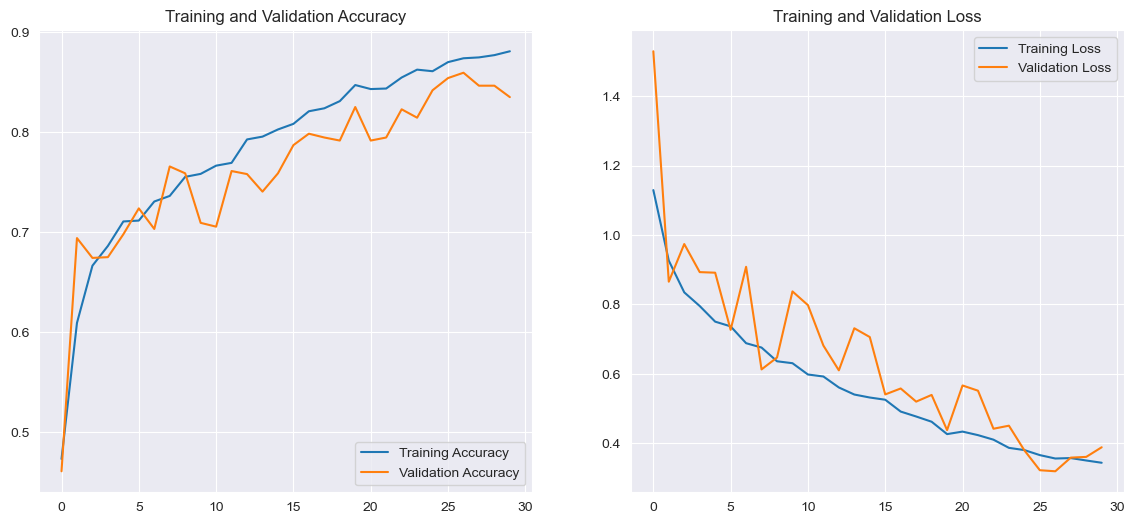

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
model.save('brain_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted class: meningioma


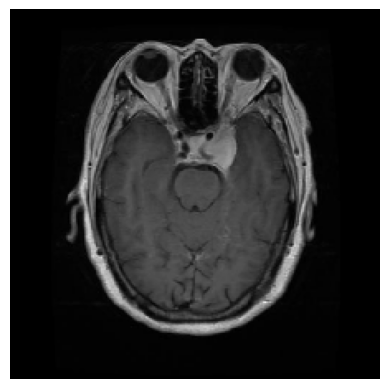

In [42]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('brain_model.h5')

image_path = 'brain_tumors/Training/meningioma/Tr-me_0013.jpg'

# Loading and preprocessing
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
class_label = class_names[predicted_class[0]] 

# Output
print(f"Predicted class: {class_label}")

plt.imshow(img)
plt.axis('off')
plt.show()
